<a href="https://www.kaggle.com/code/lithaxor/titanic-dataset-analysis?scriptVersionId=136729144" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# ANALYSIS OF TITIANIC DATASET 

Link of the dataset: https://www.kaggle.com/code/omarmohamedyehia/titanic-database-visualization

# Import Dataset

In [176]:
library(ggplot2)

df <- read.csv("/kaggle/input/titanic-dataset/Titanic.csv")

head(df, 10)

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<int>
1,male,22,1,0,7.2500,S,Third,man,FALSE,0
2,female,38,1,0,71.2833,C,First,woman,FALSE,1
3,female,26,0,0,7.9250,S,Third,woman,TRUE,1
4,female,35,1,0,53.1000,S,First,woman,FALSE,1
5,male,35,0,0,8.0500,S,Third,man,TRUE,0
6,male,NA,0,0,8.4583,Q,Third,man,TRUE,0
7,male,54,0,0,51.8625,S,First,man,TRUE,0
8,male,2,3,1,21.0750,S,Third,child,FALSE,0
9,female,27,0,2,11.1333,S,Third,woman,FALSE,1


# Data Exploration

In [177]:
str(df)

summary(df)

head(df)


'data.frame':	891 obs. of  10 variables:

 $ sex     : chr  "male" "female" "female" "female" ...

 $ age     : num  22 38 26 35 35 NA 54 2 27 14 ...

 $ sibsp   : int  1 1 0 1 0 0 0 3 0 1 ...

 $ parch   : int  0 0 0 0 0 0 0 1 2 0 ...

 $ fare    : num  7.25 71.28 7.92 53.1 8.05 ...

 $ embarked: chr  "S" "C" "S" "S" ...

 $ class   : chr  "Third" "First" "Third" "First" ...

 $ who     : chr  "man" "woman" "woman" "woman" ...

 $ alone   : logi  FALSE FALSE TRUE FALSE TRUE TRUE ...

 $ survived: int  0 1 1 1 0 0 0 0 1 1 ...


     sex                 age            sibsp           parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00   Max.   :8.000   Max.   :6.0000  
                    NA's   :177                                     
      fare          embarked            class               who           
 Min.   :  0.00   Length:891         Length:891         Length:891        
 1st Qu.:  7.91   Class :character   Class :character   Class :character  
 Median : 14.45   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 32.20                                                           
 3rd Qu.: 31.00                                                          

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<int>
1,male,22,1,0,7.2500,S,Third,man,FALSE,0
2,female,38,1,0,71.2833,C,First,woman,FALSE,1
3,female,26,0,0,7.9250,S,Third,woman,TRUE,1
4,female,35,1,0,53.1000,S,First,woman,FALSE,1
5,male,35,0,0,8.0500,S,Third,man,TRUE,0
6,male,NA,0,0,8.4583,Q,Third,man,TRUE,0


# Handling Missing Values


In [178]:
colSums(is.na(df))

titanic_clean <- df[complete.cases(df), ]

# Remove rows with missing values in specific columns
titanic_clean <- df[complete.cases(df$age), ]

# Fill missing values with mean or median
df$age[is.na(df$age)] <- mean(df$age, na.rm = TRUE)
df$fare[is.na(df$fare)] <- median(df$fare, na.rm = TRUE)



sex      age    sibsp    parch     fare embarked    class      who 
       0      177        0        0        0        0        0        0 
   alone survived 
       0        0

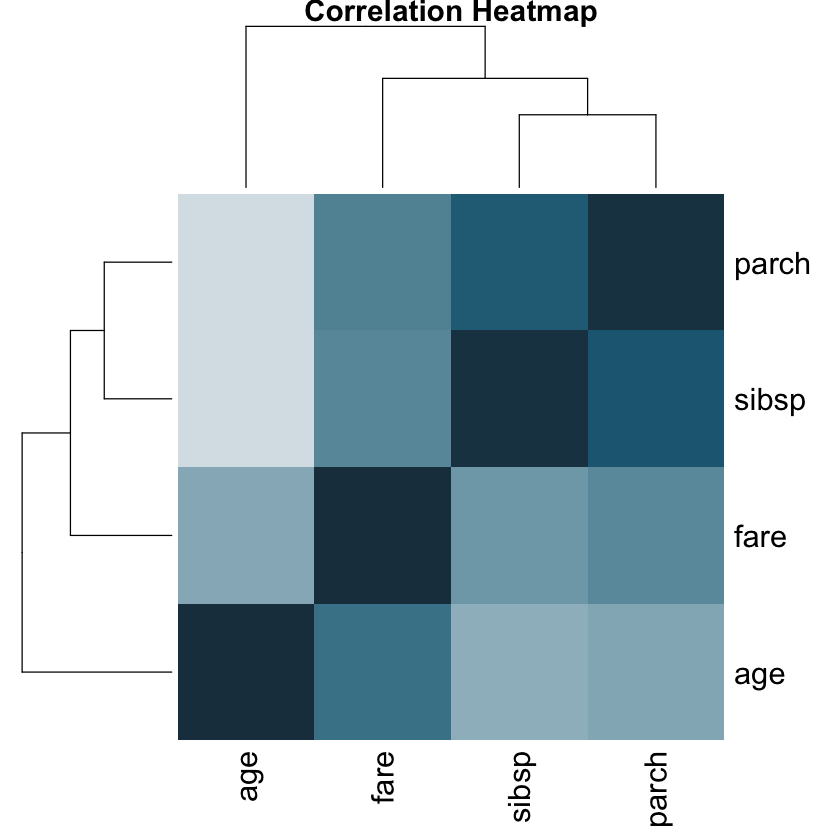

In [179]:
# Calculate the correlation matrix
cor_matrix <- cor(df[, c("age", "fare", "sibsp", "parch")])

# Create a correlation heatmap using heatmap()
heatmap(cor_matrix, 
        col = colorRampPalette(c("#D8E2E6", "#19647E", "#1F3B4D"))(100),
        main = "Correlation Heatmap")


## Data Normaizlation


In [180]:
df$age_category <- ifelse(df$who == "child", "Child", ifelse(df$who == "man", "Man", "Woman"))

# Create a age group variable
df$age_group <- cut(df$age, breaks = c(0, 18, 30, 50, 100), labels = c("Child", "Young Adult", "Adult", "Senior"))

# Visualization

## Histogram of Ages

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


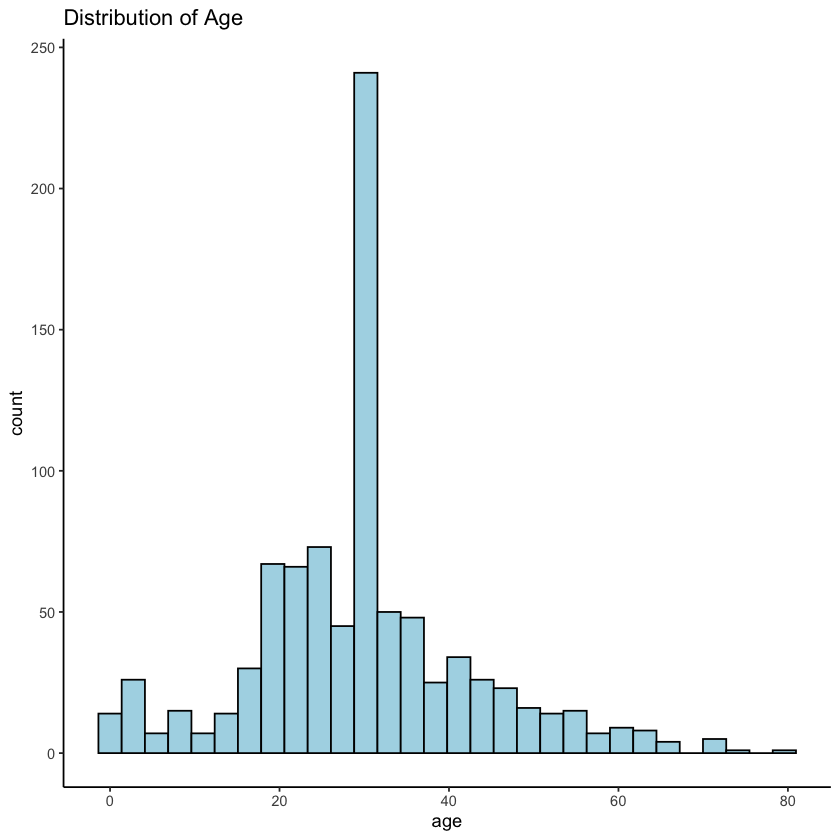

In [181]:
ggplot(df, aes(x = age)) +
  geom_histogram(fill = "lightblue", color = "black") +
  labs(title = "Distribution of Age")

## Bar Plot of Survival by Gender

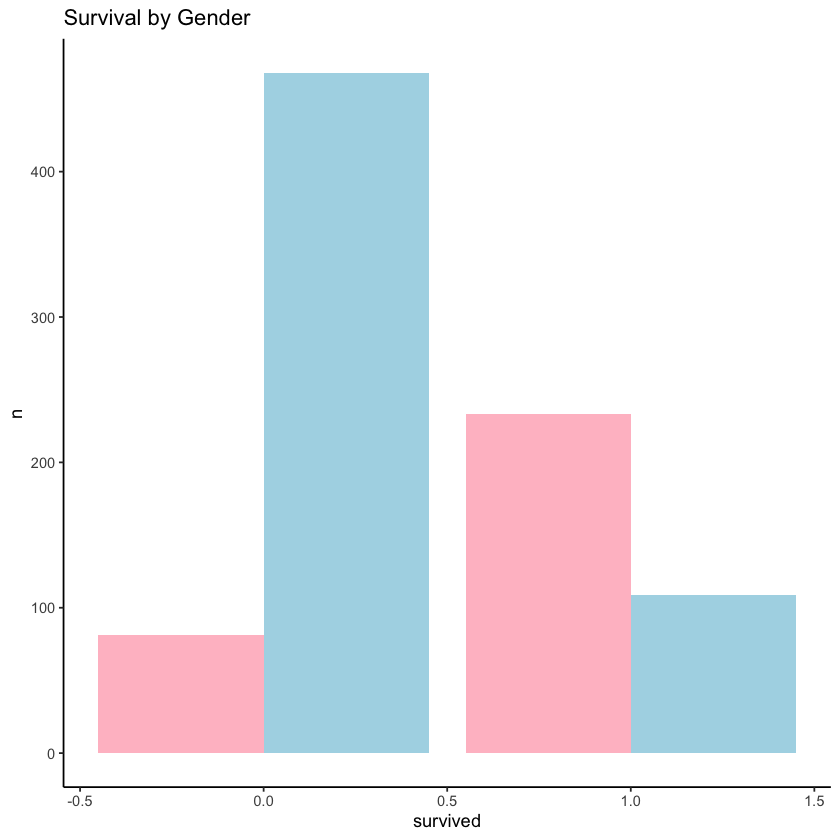

In [182]:
df %>%
  count(survived, sex) %>%
  ggplot(aes(x = survived, y = n, fill = sex)) +
  geom_col(position = "dodge") +
  scale_fill_manual(values = c("pink", "lightblue")) +
  labs(title = "Survival by Gender")

## Fare Analysis

### Fare distibution 

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived,age_category,age_group
,<chr>,<dbl>,<int>,<int>,<dbl>,<chr>,<chr>,<chr>,<lgl>,<int>,<chr>,<fct>
259,female,35,0,0,512.3292,C,First,woman,TRUE,1,Woman,Adult


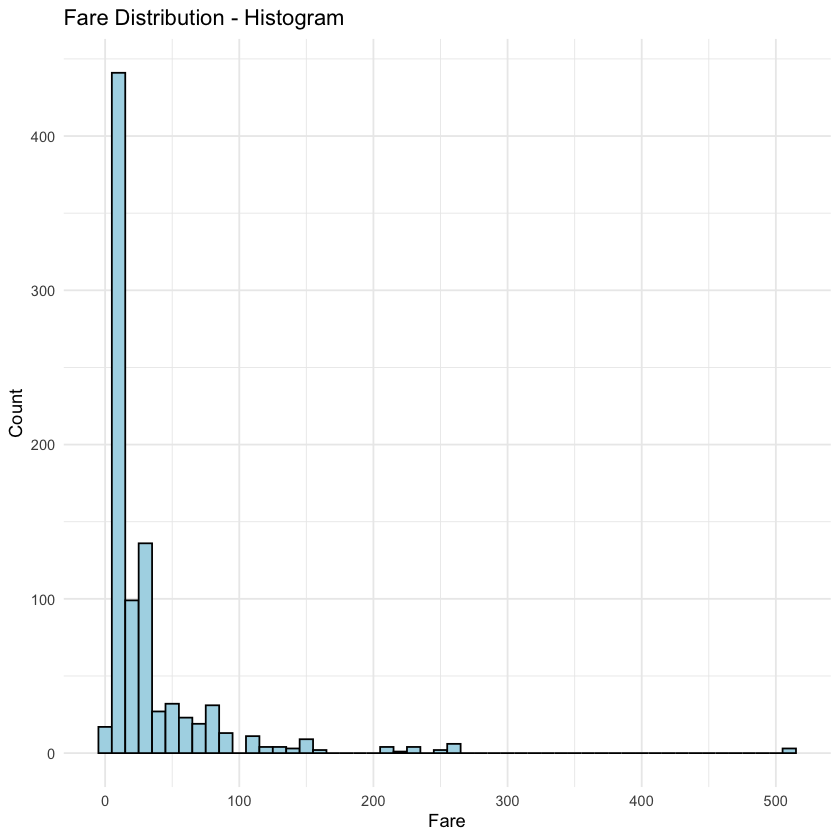

In [183]:
ggplot(df, aes(x = fare)) +
  geom_histogram(binwidth = 10, fill = "lightblue", color = "black") +
  labs(x = "Fare", y = "Count", title = "Fare Distribution - Histogram") +
  theme_minimal()

df[which.max(df$fare), ]

### Fare distribution by first, second, third class category

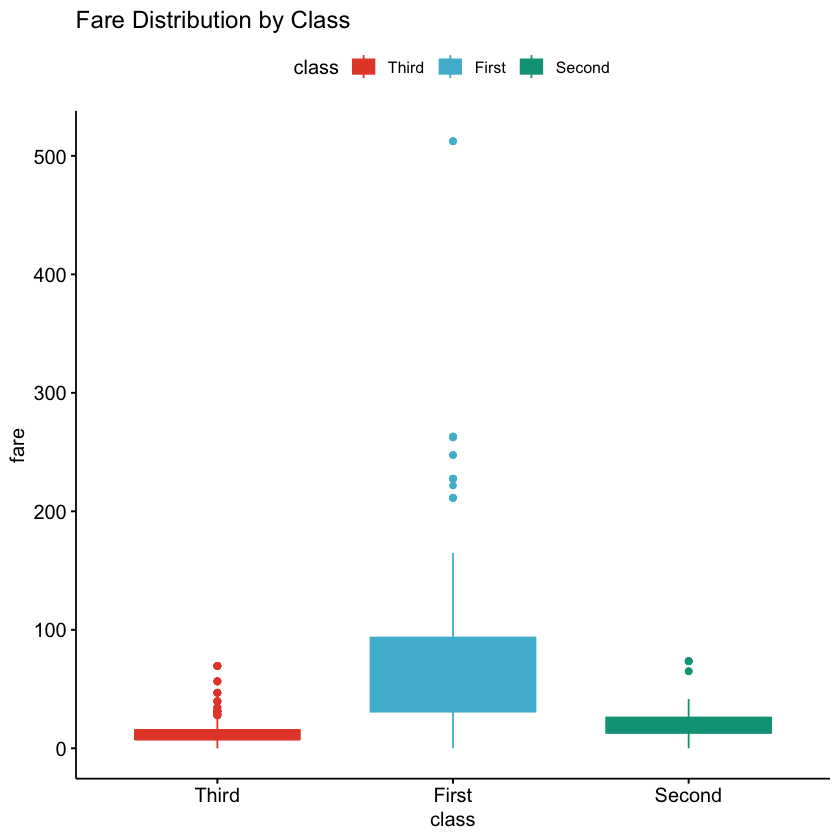

In [184]:
ggboxplot(df, x = "class", y = "fare",
          fill = "class", color = "class",
          palette = "npg") +
  labs(title = "Fare Distribution by Class")


### Fare analysis in jointplot

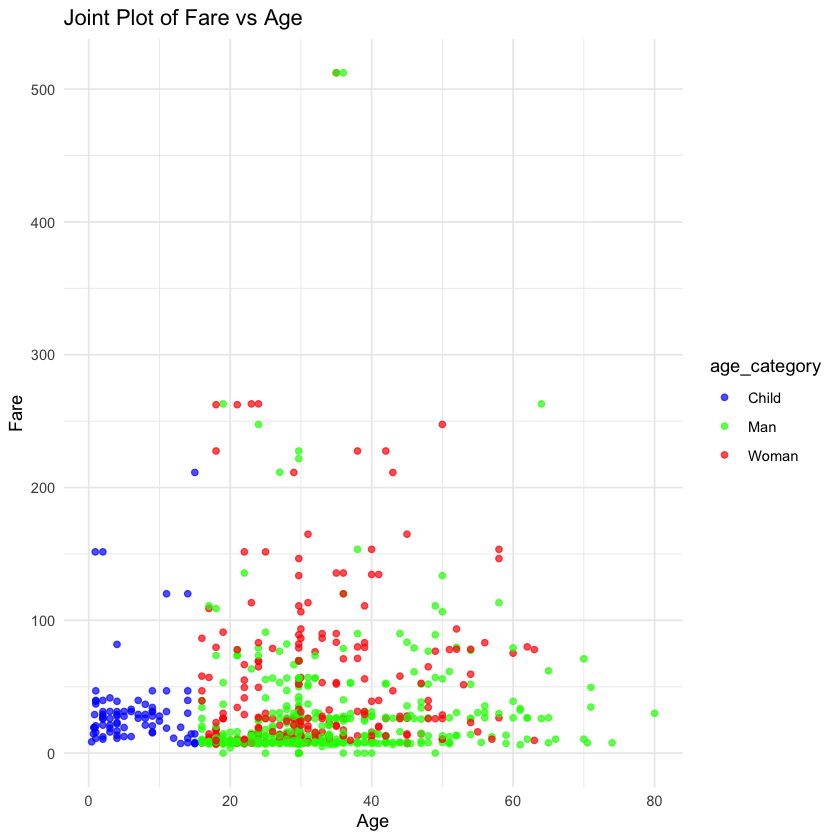

In [185]:

ggplot(df, aes(x = age, y = fare, color = age_category)) +
  geom_point(alpha = 0.7) +
  scale_color_manual(values = c("blue", "green", "red")) +
  labs(x = "Age", y = "Fare", title = "Joint Plot of Fare vs Age") +
  theme_minimal()


### Showing fare in box plot fare vs age_category(who)

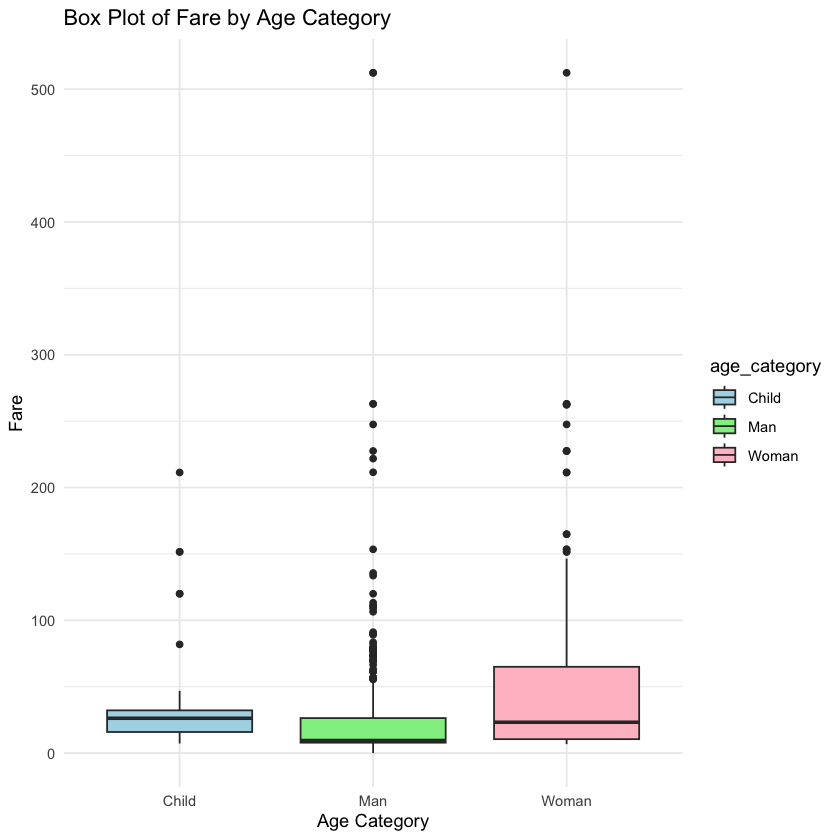

In [186]:
# SHow box plot fare by age_category

ggplot(df, aes(x = age_category, y = fare, fill = age_category)) +
  geom_boxplot() +
  scale_fill_manual(values = c("lightblue", "lightgreen", "pink")) +
  labs(x = "Age Category", y = "Fare", title = "Box Plot of Fare by Age Category") +
  theme_minimal()
  

## Survival Analysis


### Survival Rate by Man Woman Child

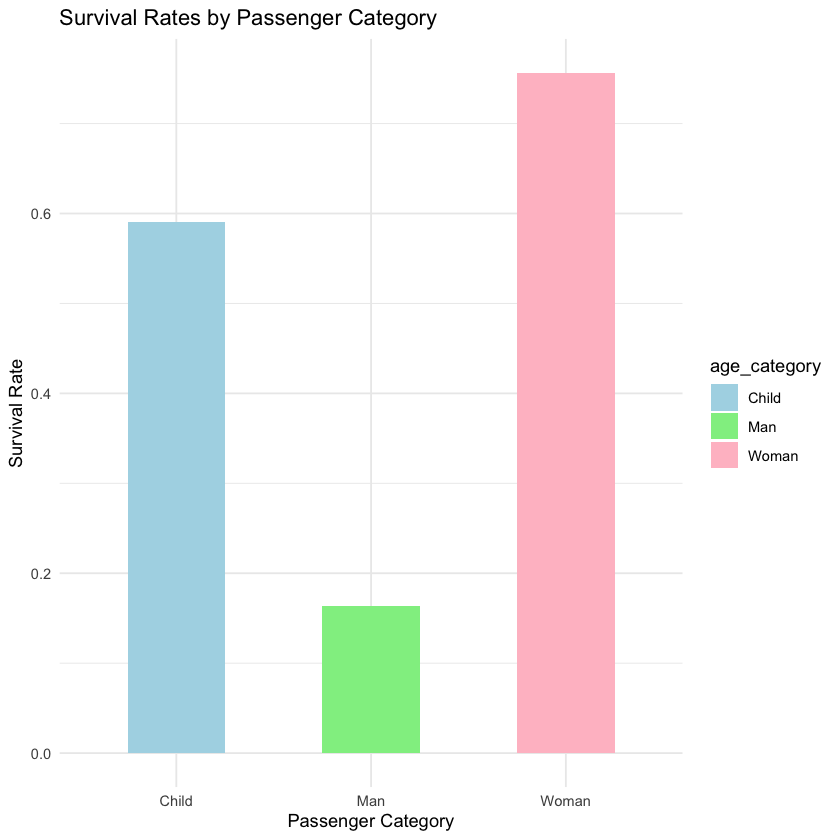

In [187]:

# Calculate the survival rates by age category
survival_rates <- df %>%
  group_by(age_category) %>%
  summarise(survival_rate = mean(survived))

# Plot the survival rates
ggplot(survival_rates, aes(x = age_category, y = survival_rate, fill = age_category)) +
  geom_bar(stat = "identity", width = 0.5) +
  labs(x = "Passenger Category", y = "Survival Rate", title = "Survival Rates by Passenger Category") +
  scale_fill_manual(values = c("lightblue", "lightgreen", "pink")) +
  theme_minimal()

### Show survival rate by class


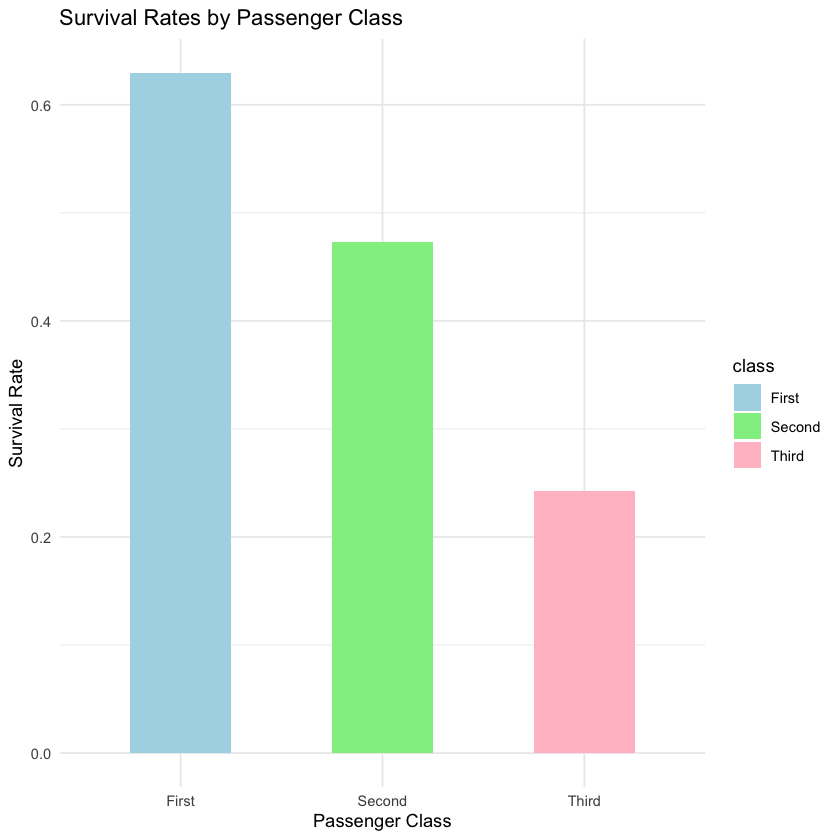

In [188]:

survival_rates <- df %>%
  group_by(class) %>%
  summarise(survival_rate = mean(survived))

ggplot(survival_rates, aes(x = class, y = survival_rate, fill = class)) +
  geom_bar(stat = "identity", width = 0.5) +
  labs(x = "Passenger Class", y = "Survival Rate", title = "Survival Rates by Passenger Class") +
  scale_fill_manual(values = c("lightblue", "lightgreen", "pink")) +
  theme_minimal()

### Show survival rate, Count between age_group

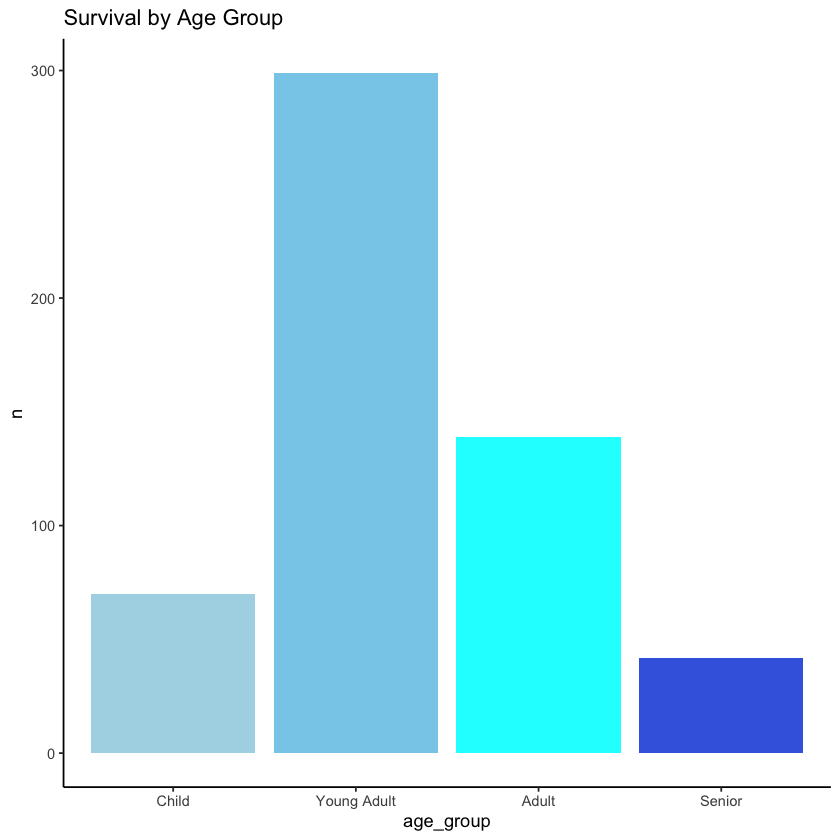

In [189]:
df %>%
  count(survived, age_group) %>%
  ggplot(aes(x = age_group, y = n, fill = age_group)) +
  geom_col(position = "dodge") +
  scale_fill_manual(values = c("lightblue", "skyblue", "cyan", "royalblue")) +
  labs(title = "Survival by Age Group")

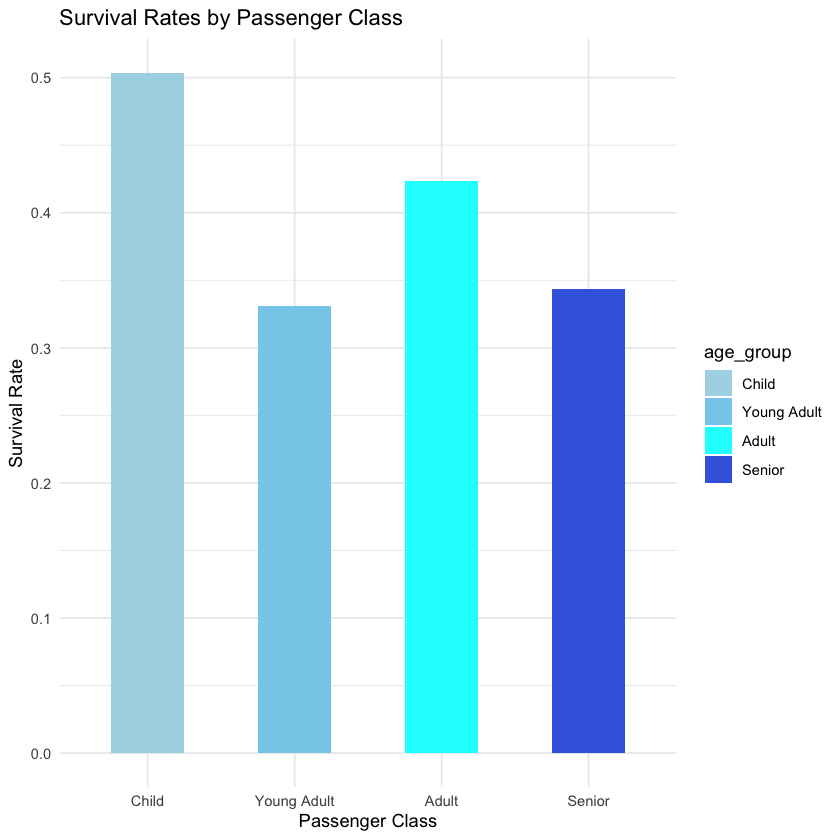

In [190]:
# show survival rate by age_group

survival_rates <- df %>%
  group_by(age_group) %>%
  summarise(survival_rate = mean(survived))

ggplot(survival_rates, aes(x = age_group, y = survival_rate, fill = age_group)) +
  geom_bar(stat = "identity", width = 0.5) +
  labs(x = "Passenger Class", y = "Survival Rate", title = "Survival Rates by Passenger Class") +
  scale_fill_manual(values = c("lightblue", "skyblue", "cyan", "royalblue")) +
  theme_minimal()